Saving Churn_Modelling.csv to Churn_Modelling.csv


Saving Churn_Modelling.csv to Churn_Modelling (1).csv
Dataset shape: (10000, 14)

Columns:
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Unique values in 'Geography': ['France' 'Spain' 'Germany']
Unique values in 'Gender': ['Female' 'Male']
Random Forest Accuracy: 0.866


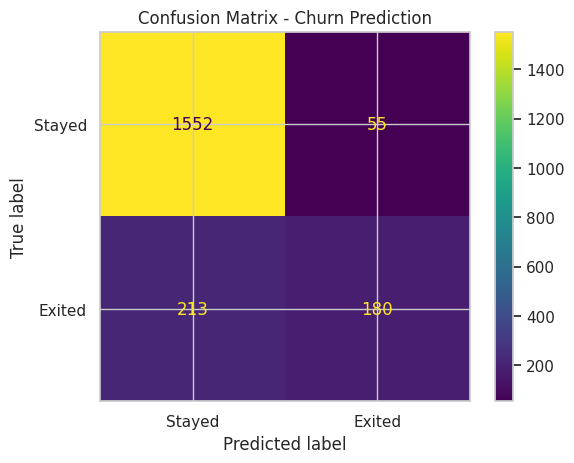

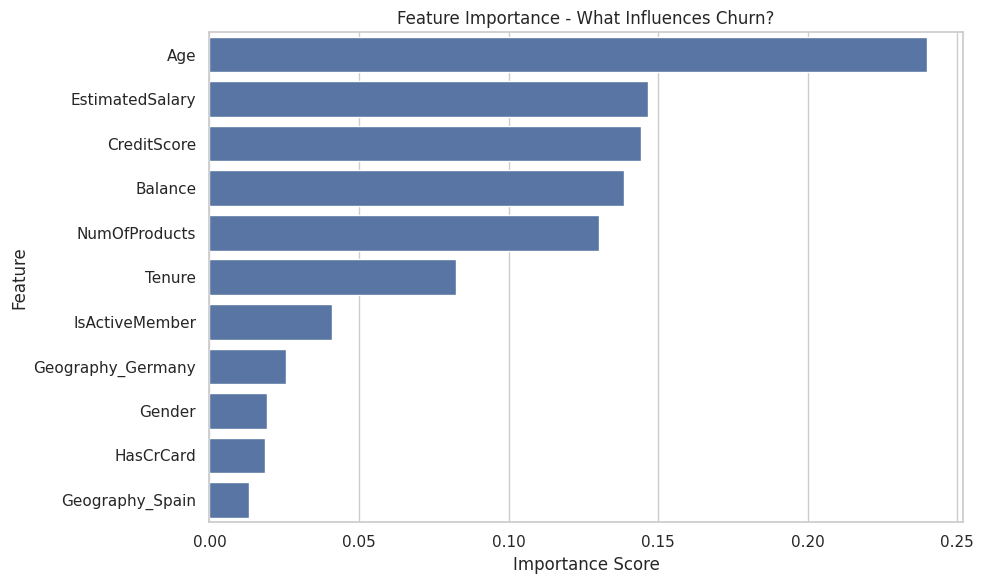

In [4]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")
df.head()

# ------------------------------
# 1. Import Required Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer

sns.set(style="whitegrid")

# ------------------------------
# 2. Load Dataset
# ------------------------------
from google.colab import files
uploaded = files.upload()  # Upload Churn_Modelling.csv

df = pd.read_csv('/content/Churn_Modelling.csv')

# ----------------------------

# 3. Data Overview
# ------------------------------
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
df.head()

# ------------------------------
# 4. Drop Unnecessary Columns
# ------------------------------
# Drop RowNumber, CustomerId, and Surname as they do not contribute to prediction
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# ------------------------------
# 5. Encode Categorical Features
# ------------------------------
# View unique values of categorical features
print("\nUnique values in 'Geography':", df['Geography'].unique())
print("Unique values in 'Gender':", df['Gender'].unique())

# Label Encode Gender (Binary)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male:1, Female:0

# One-Hot Encode Geography (3 categories: France, Spain, Germany)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# ------------------------------
# 6. Feature and Target Split
# ------------------------------
X = df.drop('Exited', axis=1)   # Features
y = df['Exited']                # Target variable

# ------------------------------
# 7. Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# 8. Train a Classification Model
# ------------------------------
# Using Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# ------------------------------
# 9. Evaluate the Model
# ------------------------------
acc = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Stayed", "Exited"]).plot()
plt.title("Confusion Matrix - Churn Prediction")
plt.show()

# ------------------------------
# 10. Feature Importance
# ------------------------------
feature_importance = rf_model.feature_importances_
features = X.columns

# Create a dataframe for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - What Influences Churn?")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
